# Week 9 - Morphology

### Import libraries

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

### 3x3 Cross SED(Structuring Element Dilation) Morphology without morphology library

In [3]:
def image_dilation(F, w):
	# F: input image
	# w: structuring element
	# return: dilated output image
	p, q = F.shape

	output_image = np.zeros((p,q), dtype=np.uint8)
 
	# Generate SED
	SED = np.ones((w,w), dtype=np.uint8)
	c = int((w-1)/2)
 
	# Dilation
	for i in range(c, p-c):
		for j in range(c, q-c):
			temp = F[i-c:i+c+1, j-c:j+c+1]
			product = temp * SED
			output_image[i,j] = np.max(product)
 
	return output_image


/tmp/ipykernel_25869/2577496554.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


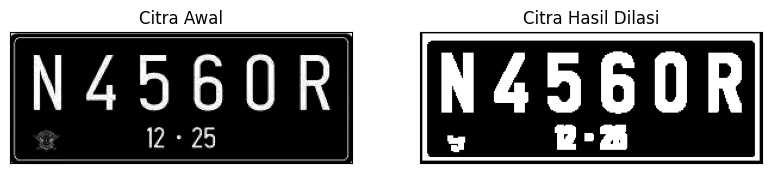

In [4]:
img_dilation = cv2.imread('./images/plat nomer.jpg', 0)
gamma_image = np.zeros(img_dilation.shape, dtype=np.uint8)

for y in range(img_dilation.shape[0]):
	for x in range(img_dilation.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (img_dilation[y,x]/255.0) ** (2/1), 0, 255)
  
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
w=5
output_image = image_dilation(thresh,w)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]), plt.yticks([])
plt.show()

### 3x3 Cross SED(Structuring Element Dilation) Morphology with morphology library

[[0 1 0]
 [1 1 1]
 [0 1 0]]


/tmp/ipykernel_25869/1419662814.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


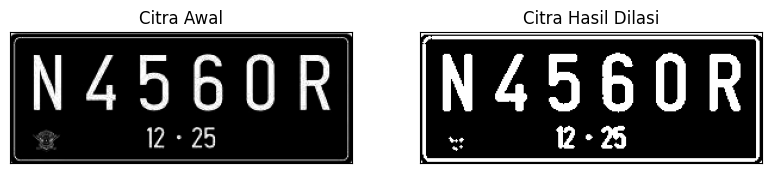

In [12]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]],np.uint8)
output_image = cv2.dilate(thresh,kernel,iterations = 1)

print(kernel)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]), plt.yticks([])
plt.show()

### 5x5 Cross SEE(Structuring Element Erotion) Erosion without morphology library

In [37]:
def image_erotion(F, k):
	# F: input image
	# k: structuring element
	# return: eroded output image
	height, width = F.shape

	output_image = np.zeros((height, width), dtype=np.uint8)

	# Generate SEE
	SEE = np.ones((k,k), dtype=np.uint8)
	c = int((k-1)/2)

	# Erosion
	for i in range(c, height-c):
		for j in range(c, width-c):
			temp = F[i-c:i+c+1, j-c:j+c+1]
			product = temp * SEE
			output_image[i,j] = np.min(product)

	return output_image


/tmp/ipykernel_25869/2310139301.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


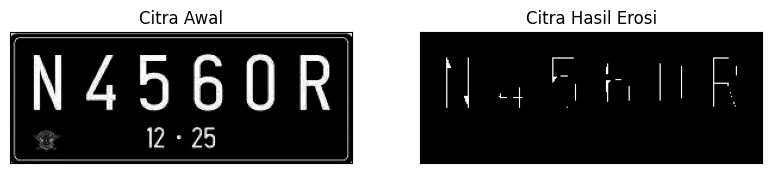

In [38]:
img_erotion = cv2.imread('./images/plat nomer.jpg', 0)
gamma_image = np.zeros(img_erotion.shape, img_erotion.dtype)

for y in range(img_erotion.shape[0]):
	for x in range(img_erotion.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (img_erotion[y,x]/255.0) ** (2/1), 0, 255)

ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
k = 5
output_image = image_erotion(thresh,k)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()



### 5x5 Cross SEE(Structuring Element Erotion) Erosion with morphology library

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


/tmp/ipykernel_25869/3060048744.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


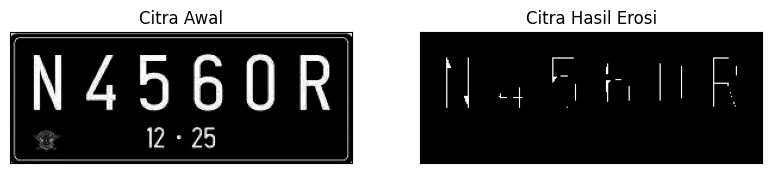

In [39]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
output_image = cv2.erode(thresh,kernel,iterations = 1)

print(kernel)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()

### 3x3 SE Opening without morphology library

In [25]:
def image_opening(F, w):
	# F: input image
	# w: structuring element
	# return: opened output image
	eroded_image = image_erotion(F, w)
	opened_image = image_dilation(eroded_image, w)
	return opened_image


/tmp/ipykernel_25869/3104791216.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


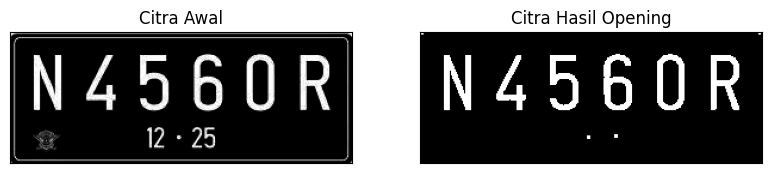

In [27]:
img_opening = cv2.imread('./images/plat nomer.jpg', 0)
gamma_image = np.zeros(img_opening.shape, img_opening.dtype)

for y in range(img_opening.shape[0]):
	for x in range(img_opening.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (img_opening[y,x]/255.0) ** (2/1), 0, 255)

ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
w = 3
output_image = image_opening(thresh, w)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Opening'),plt.xticks([]), plt.yticks([])
plt.show()

/tmp/ipykernel_25869/1342474066.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


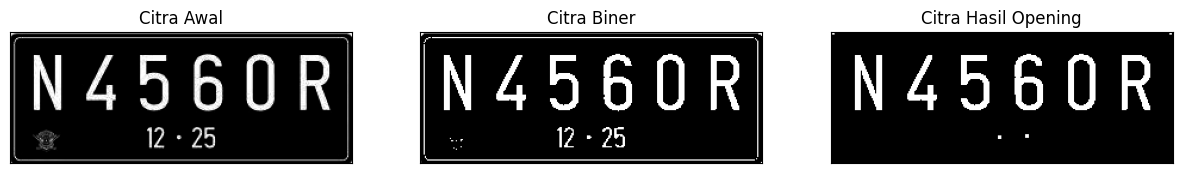

In [28]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
w = 3
output_image = image_opening(thresh, w)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Opening'),plt.xticks([]), plt.yticks([])
plt.show()

### Comparing 3x3 and 5x5 SE Dilation

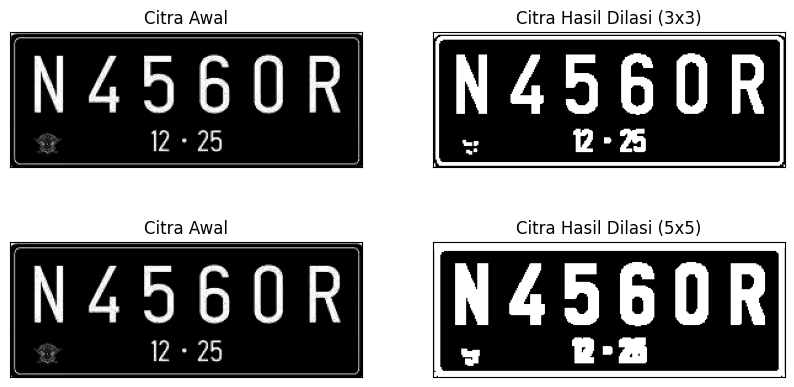

In [42]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel_3 = np.ones((3,3),np.uint8)
kernel_5 = np.ones((5,5),np.uint8)
output_image_3 = cv2.dilate(thresh,kernel_3,iterations = 1)
output_image_5 = cv2.dilate(thresh,kernel_5,iterations = 1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0, 0].imshow(gamma_image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(output_image_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Dilasi (3x3)')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(gamma_image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(output_image_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Dilasi (5x5)')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

### Comparing 3x5 and 5x7 SE Erotion

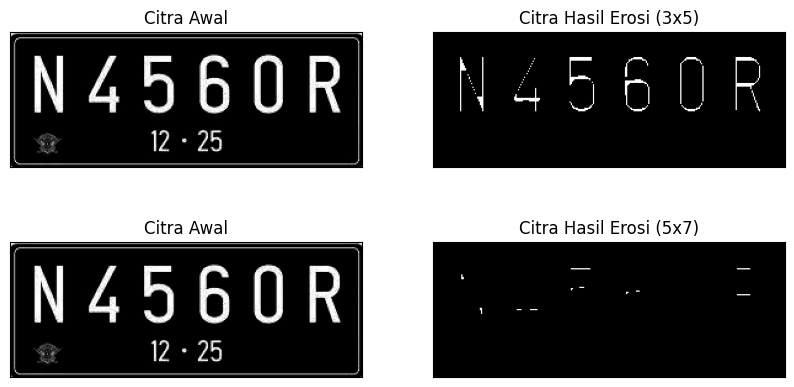

In [43]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel_3 = np.ones((3,5),np.uint8)
kernel_5 = np.ones((5,7),np.uint8)
output_image_3 = cv2.erode(thresh,kernel_3,iterations = 1)
output_image_5 = cv2.erode(thresh,kernel_5,iterations = 1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0, 0].imshow(gamma_image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(output_image_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Erosi (3x5)')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(gamma_image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(output_image_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Erosi (5x7)')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

### Comparing Vertical Line 3 and Vertical Line  5 SE Erosion

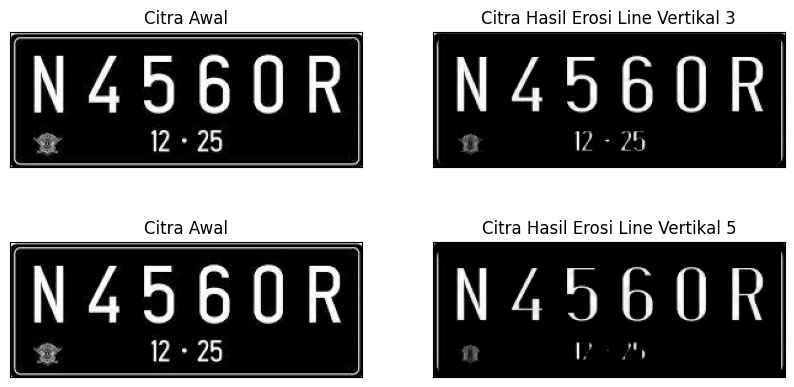

In [44]:
image = cv2.imread('./images/plat nomer.jpg', 0)

vertical_line_3 = np.ones((3,1), dtype=np.uint8)
vertical_line_5 = np.ones((5,1), dtype=np.uint8)

eroded_img_3 = cv2.erode(image, vertical_line_3, iterations=1)
eroded_img_5 = cv2.erode(image, vertical_line_5, iterations=1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(eroded_img_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Erosi Line Vertikal 3')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(eroded_img_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Erosi Line Vertikal 5')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()